In [366]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import funcoes
import numpy as np
import seaborn as sns

In [347]:
#importando dataset já com as colunas selecionadas
df = pd.read_csv(r"AB_NYC_2019.csv", usecols=[0,2,4,5,8,9,10,11,14,15],)

In [348]:
#dataset com exclusão das hospedagem sem disponibilidade
df["is_open"] =  list(map(lambda x : x!=0, df["availability_365"]))
df_base = df.copy()
df = df.loc[df["is_open"] == True]
display(df)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,is_open
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,6,365,True
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,True
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,1,365,True
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,True
5,5099,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129,True
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9,True
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,2,36,True
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,1,27,True
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2,True


In [349]:
df_base["is_open"].value_counts()

is_open
True     31362
False    17533
Name: count, dtype: int64

In [350]:
#dataset agrupado por distrito
df_bairro = df.groupby(["neighbourhood_group","room_type"]).agg({"price":"mean","id":"count","number_of_reviews":"sum"}).reset_index()
df_bairro["percentual"] = round((df_bairro["id"] / df_bairro["id"].sum())*100 , 2)
display(df_bairro.head())

,neighbourhood_group,room_type,price,id,number_of_reviews,percentual
0,Bronx,Entire home/apt,131.682390,318,11209,1.01
1,Bronx,Private room,66.699634,546,14977,1.74
2,Bronx,Shared room,61.200000,50,396,0.16
3,Brooklyn,Entire home/apt,187.711133,6072,238759,19.36
4,Brooklyn,Private room,80.701190,5880,181852,18.75


Text(0, 0.5, 'Opções de Locações')

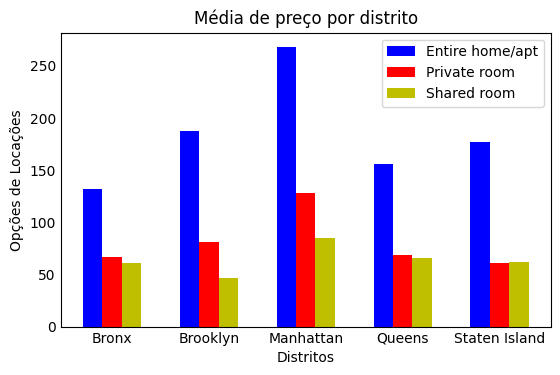

In [351]:
#Gráfico de preço médio por distrito e com divisão do tipo de instalagem 
x = np.arange(5) 
y1 = np.array(df_bairro.loc[df_bairro["room_type"] == "Entire home/apt"]["price"])
y2 = np.array(df_bairro.loc[df_bairro["room_type"] == "Private room"]["price"])
y3 = np.array(df_bairro.loc[df_bairro["room_type"] == "Shared room"]["price"])
width = 0.2

fig = plt.figure(figsize = (5,3))
plt.bar(x-0.2, y1, width, color = "b")
plt.bar(x, y2, width, color = "r")
plt.bar(x+0.2, y3, width, color = "y")
plt.xticks(x, df_bairro["neighbourhood_group"].unique())
plt.legend(["Entire home/apt","Private room","Shared room"])
plt.title("Média de preço por distrito")
plt.xlabel("Distritos")
plt.ylabel("Opções de Locações")

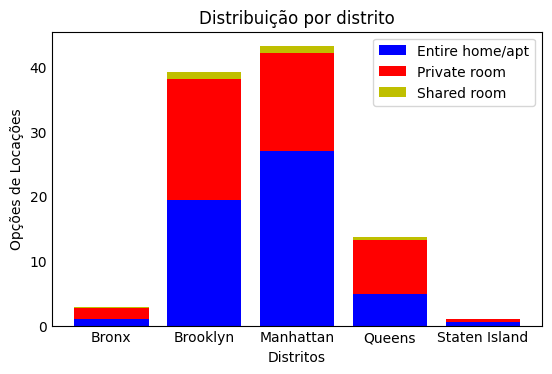

In [352]:
#Gráfico de disponibilidade por distrito com divisão do tipo de instalagem 
x = df_bairro["neighbourhood_group"].unique()
y1 = np.array(df_bairro.loc[df_bairro["room_type"] == "Entire home/apt"]["percentual"])
y2 = np.array(df_bairro.loc[df_bairro["room_type"] == "Private room"]["percentual"])
y3 = np.array(df_bairro.loc[df_bairro["room_type"] == "Shared room"]["percentual"])

fig = plt.figure(figsize = (5,3))
plt.bar(x, y1, color = "b")
plt.bar(x, y2, bottom = y1, color = "r")
plt.bar(x, y3, bottom = y1+y2, color = "y")
plt.title("Distribuição por distrito")
plt.xlabel("Distritos")
plt.ylabel("Opções de Locações")
plt.legend(["Entire home/apt","Private room","Shared room"])

plt.show()

In [353]:
#Tabela de distribuição de frequência com classe de intervalos para a quantidade de opções por host
df_host = df[["host_id","calculated_host_listings_count"]].drop_duplicates()
tab_dist = funcoes.tab_dist(df_host["calculated_host_listings_count"])
tab_dist.loc[tab_dist["Frequência"] != 0].iloc[:,:-1]

,Intervalo de Classe,Frequência,Frequência Relativa (%)
0,"[0, 10)",21696,99.481865
1,"[10, 20)",73,0.334724
2,"[20, 30)",13,0.059608
3,"[30, 40)",11,0.050438
4,"[40, 50)",4,0.018341
5,"[50, 60)",3,0.013756
6,"[60, 70)",1,0.004585
8,"[80, 90)",1,0.004585
9,"[90, 100)",3,0.013756
10,"[100, 110)",1,0.004585


In [379]:
#Faturamento do host por carteira de acomodações 
df_host = df.groupby(["host_id", "neighbourhood_group"]).agg({"id":"count","price":"sum"}).sort_values(by=["price"], ascending=False).reset_index()
df_host

,host_id,neighbourhood_group,id,price
0,219517861,Manhattan,327,82795
1,107434423,Manhattan,230,69741
2,205031545,Manhattan,49,35294
3,30283594,Manhattan,121,33581
4,156158778,Manhattan,6,26071
...,...,...,...,...
21876,197169969,Queens,1,10
21877,205820814,Bronx,1,10
21878,97001292,Queens,1,10
21879,167570251,Brooklyn,1,10


In [355]:
#Quantidade de host por distrito
df_id = df_host.groupby(["neighbourhood_group"]).agg({"host_id":"count"}).sort_values(by=["host_id"], ascending=False).reset_index()
df_id

,neighbourhood_group,host_id
0,Manhattan,9188
1,Brooklyn,9013
2,Queens,2820
3,Bronx,639
4,Staten Island,221


In [356]:
#Média das estadias por distrito e tipo de hospedagem
df_estadia = df.groupby(["neighbourhood_group", "room_type"]).agg({"minimum_nights":"mean", "price":"mean"}).reset_index()
df_estadia

,neighbourhood_group,room_type,minimum_nights,price
0,Bronx,Entire home/apt,6.295597,131.682390
1,Bronx,Private room,4.117216,66.699634
2,Bronx,Shared room,3.800000,61.200000
3,Brooklyn,Entire home/apt,7.364460,187.711133
4,Brooklyn,Private room,6.468027,80.701190
5,Brooklyn,Shared room,8.525974,46.964286
6,Manhattan,Entire home/apt,13.575643,268.215614
7,Manhattan,Private room,6.345253,127.971560
8,Manhattan,Shared room,7.857143,84.517857
9,Queens,Entire home/apt,5.769032,155.343871


In [357]:
#Média das estadias por distrito e tipo de hospedagem
df_estadia = df.groupby(["availability_365", "neighbourhood_group","room_type"]).agg({"minimum_nights":"mean", "price":"mean"}).reset_index()
df_estadia

,availability_365,neighbourhood_group,room_type,minimum_nights,price
0,1,Bronx,Entire home/apt,1.250000,173.500000
1,1,Bronx,Private room,2.250000,50.250000
2,1,Brooklyn,Entire home/apt,8.294118,157.362745
3,1,Brooklyn,Private room,5.689655,64.775862
4,1,Brooklyn,Shared room,1.750000,46.000000
...,...,...,...,...,...
3226,365,Queens,Entire home/apt,26.292683,348.073171
3227,365,Queens,Private room,4.948148,99.362963
3228,365,Queens,Shared room,7.428571,63.750000
3229,365,Staten Island,Entire home/apt,4.500000,495.000000


In [358]:
#Tabela de distribuição de frequência com classe de intervalos para a quantidade de opções por host
df_estadia = df.groupby(["availability_365", "neighbourhood_group","room_type"]).agg({"minimum_nights":"mean", "price":"mean"}).reset_index()
tab_dist = funcoes.tab_dist(df_estadia["availability_365"])
tab_dist = tab_dist.loc[tab_dist["Frequência"] != 0].iloc[:,:-1]


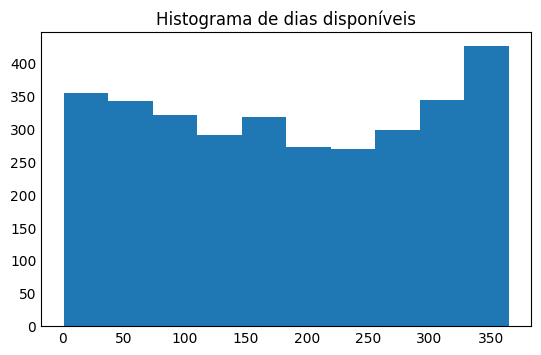

In [377]:
# Gráfico de histograma da distribuição de dias disponivéis
fig = plt.figure(figsize = (5,3))
plt.hist(df_estadia["availability_365"], bins = 10)
plt.title("Histograma de dias disponíveis")
plt.show()

In [374]:
#Correlações para variaveis númericas
df_cor = df.astype({"id":"str","host_id":str})
df_cor = df_cor.select_dtypes(exclude = ["object","bool"])
df_cor.corr().style.background_gradient(cmap = "Blues")

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.039449,-0.072919,0.060828,0.074509
minimum_nights,0.039449,1.000000,-0.116086,0.124207,0.125418
number_of_reviews,-0.072919,-0.116086,1.000000,-0.115415,0.009881
calculated_host_listings_count,0.060828,0.124207,-0.115415,1.000000,0.187949
availability_365,0.074509,0.125418,0.009881,0.187949,1.000000
